In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data=pd.read_csv("nilai.csv", engine="python")
data

,ID,Nama,Umur,Gender,Nilai,Matkul,Tanggal,UTS,UAS,cluster
0,1,Budi,24,Laki-laki,85.0,Kimia,9/8/2023,90,80,kurang
1,2,Ani,21,Perempuan,77.5,Matematika,15/8/2023,75,80,kurang
2,3,Joko,20,Laki-laki,90.0,Biologi,15/8/2023,85,95,baik
3,4,Siti,21,Perempuan,60.0,Matematika,9/8/2023,55,65,kurang
4,5,Agus,23,Laki-laki,77.5,Fisika,9/8/2023,80,75,kurang
...,...,...,...,...,...,...,...,...,...,...
95,96,Yanto,24,Laki-laki,81.0,Fisika,15/8/2023,76,86,baik
96,97,Dina,22,Perempuan,82.0,Kimia,15/8/2023,92,72,kurang
97,98,Fery,22,Laki-laki,80.5,Matematika,15/8/2023,87,74,kurang
98,99,Febi,22,Perempuan,72.0,Biologi,15/8/2023,74,70,kurang


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           100 non-null    int64  
 1   Nama         100 non-null    object 
 2   Umur         100 non-null    int64  
 3   Gender       100 non-null    object 
 4   Nilai        100 non-null    float64
 5   Matkul       100 non-null    object 
 6   Tanggal      100 non-null    object 
 7   UTS          100 non-null    int64  
 8   UAS          100 non-null    int64  
 9   cluster      100 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'PERSEBARAN NILAI')

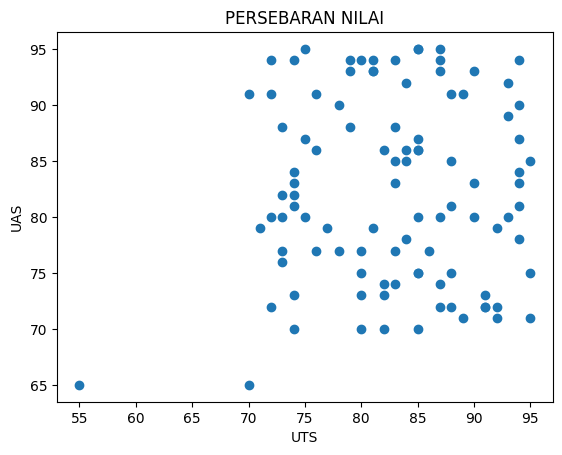

In [101]:
plt.scatter(data["UTS "],data['UAS'])

plt.xlabel("UTS")
plt.ylabel("UAS")
plt.title('PERSEBARAN NILAI')

In [102]:
x_train=data.iloc[:,[7,8]].values
x_train

array([[90, 80],
       [75, 80],
       [85, 95],
       [55, 65],
       [80, 75],
       [75, 95],
       [85, 95],
       [70, 65],
       [80, 70],
       [85, 80],
       [79, 88],
       [95, 85],
       [94, 81],
       [88, 91],
       [88, 85],
       [74, 84],
       [76, 77],
       [85, 70],
       [93, 80],
       [74, 94],
       [74, 82],
       [81, 94],
       [89, 71],
       [90, 93],
       [93, 92],
       [85, 75],
       [76, 91],
       [83, 74],
       [85, 87],
       [89, 91],
       [87, 72],
       [92, 79],
       [73, 76],
       [95, 75],
       [93, 89],
       [86, 77],
       [88, 75],
       [80, 77],
       [85, 75],
       [73, 82],
       [81, 93],
       [81, 79],
       [82, 86],
       [72, 94],
       [95, 71],
       [78, 90],
       [84, 92],
       [72, 80],
       [79, 93],
       [70, 91],
       [94, 90],
       [82, 74],
       [94, 87],
       [83, 94],
       [94, 84],
       [94, 83],
       [87, 95],
       [87, 80],
       [73, 80

In [103]:
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[0.875     , 0.5       ],
       [0.5       , 0.5       ],
       [0.75      , 1.        ],
       [0.        , 0.        ],
       [0.625     , 0.33333333],
       [0.5       , 1.        ],
       [0.75      , 1.        ],
       [0.375     , 0.        ],
       [0.625     , 0.16666667],
       [0.75      , 0.5       ],
       [0.6       , 0.76666667],
       [1.        , 0.66666667],
       [0.975     , 0.53333333],
       [0.825     , 0.86666667],
       [0.825     , 0.66666667],
       [0.475     , 0.63333333],
       [0.525     , 0.4       ],
       [0.75      , 0.16666667],
       [0.95      , 0.5       ],
       [0.475     , 0.96666667],
       [0.475     , 0.56666667],
       [0.65      , 0.96666667],
       [0.85      , 0.2       ],
       [0.875     , 0.93333333],
       [0.95      , 0.9       ],
       [0.75      , 0.33333333],
       [0.525     , 0.86666667],
       [0.7       , 0.3       ],
       [0.75      , 0.73333333],
       [0.85      , 0.86666667],
       [0.

In [104]:
inersia= []

k_range= range(1,10) 
for k in k_range:
    km= KMeans(n_clusters=k).fit(x_train)
    inersia.append(km.inertia_)
inersia


[11.085547222222221,
 5.495643585292022,
 3.798858470471522,
 3.388859845870716,
 2.4046093527712697,
 1.8062338860417901,
 1.6313585961106791,
 1.4390910915292046,
 1.1013452492496607]

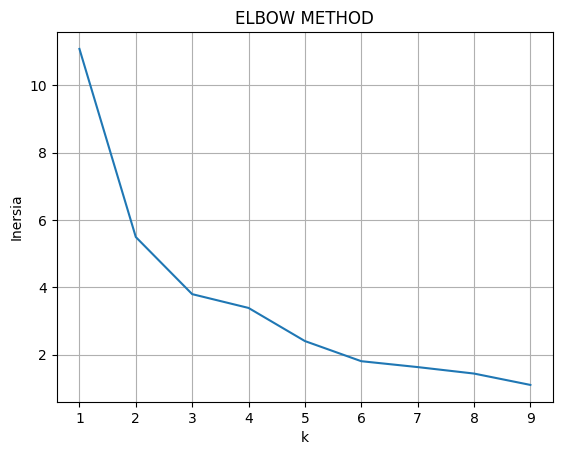

In [105]:
plt.xlabel("k")
plt.ylabel("Inersia")
plt.title("ELBOW METHOD")
plt.grid()
plt.plot(k_range,inersia)

In [106]:
kmeans=KMeans(n_clusters=2)
y_cluster=kmeans.fit_predict(x_train)
y_cluster

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [107]:
data["cluster"]= y_cluster


In [108]:
kmeans.cluster_centers_

array([[0.67924528, 0.35157233],
       [0.71170213, 0.82411348]])

C:\Users\puguh\AppData\Local\Temp\ipykernel_11336\3714805581.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1],cmap='rainbow',marker='+',s=150)
C:\Users\puguh\AppData\Local\Temp\ipykernel_11336\3714805581.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1],cmap='rainbow',marker='+',s=150)
C:\Users\puguh\AppData\Local\Temp\ipykernel_11336\3714805581.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'SEBARAN NILAI')

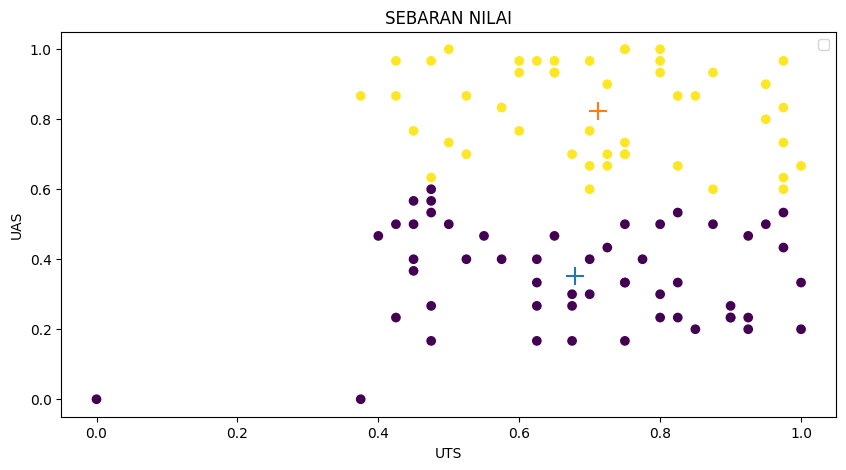

In [109]:
plt.figure(figsize=(10,5))
plt.scatter(x_train[:,0],x_train[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1],cmap='rainbow',marker='+',s=150)
plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1],cmap='rainbow',marker='+',s=150)
plt.xlabel("UTS")
plt.ylabel('UAS')
plt.legend()
plt.title('SEBARAN NILAI')